In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def read_set(fname):
    assert isinstance(fname,str)
    '''
    input:name of the csv file
    input type: string
    output: an object of pandas.DataFrame
    output type: pandas.DataFrame
    
    function:read the csv file and return data set
    '''
    return pd.read_csv(fname, delimiter='\t', encoding='utf-8')


In [5]:
def select_data_and_combine(basics_fname,ratings_fname,show_type):
    '''
    input:
    basic_fname:name of the file which contains title's basic information. type:string
    ratings_fname:name of the file which contains title's rating information. type:string
    show_type:the show type we want to select. type:string
    
    output: an object of pandas.DataFrame which combines the two data sets
    output type: pandas.DataFrame
    
    function:select the data which we want corresponding to the type of the show.Then combine it with the rating data
    '''
    assert isinstance(basics_fname,str)
    assert isinstance(ratings_fname,str)
    assert isinstance(show_type,str)
    
    title_basics=read_set(basics_fname)# read file
    title_ratings=read_set(ratings_fname)# read file
    
    title_basics_selected = title_basics[title_basics['titleType'] == show_type] #select data we want
    title_basics_and_ratings=pd.merge(title_basics_selected,title_ratings,how='inner')#combine the two dataset
    title_basics_and_ratings=title_basics_and_ratings[title_basics_and_ratings.genres != '\\N']#remove the incomplete data 
    
    return title_basics_and_ratings






In [6]:
def split_rows(data,column_name):
    '''
    input:
    data:an object of pandas.DataFrame whose rows need to be divided. type: pandas.DataFrame
    name_of_the_column: name of the column which we divide the rows by. type:string
    
    output:an object of pandas.DataFrame whose rows has been divided
    output type:pandas.DataFrame
    '''
    assert isinstance(column_name,str)
    
    tem=data[column_name].str.split(',',expand=True).stack().reset_index() #split the column and reindex
    tem.columns=['level_0','level_1','new_'+column_name]#name the new column
    res=pd.merge(tem,data,how='inner',left_on='level_0',right_index=True)#combine the column we just got with the raw dataset
    
    res=res.drop('level_0',1)#remove useless column
    res=res.drop('level_1',1)#remove useless column
    res=res.drop(column_name,1)#remove useless column
    
    return res




In [7]:
def rank(data,column_name,year_start,year_end):
    '''
    input:
    data:an object of pandas.DataFrame which we will operate on. type: pandas.DataFrame
    column_name:name of the column which we will rank data by. type:string
    year_start,year_end:year:the starting and ending years of the data which we will rank on. type:int
    
    output:an object of pandas.DataFrame which we have already sorted. type:pandas.DataFrame
    '''
    tem=data[data['startYear']>=year_start] #select data
    grp=tem[tem['startYear']<=year_end].groupby('new_'+column_name) #select data and group the data
    res=grp.mean().drop('isAdult',1).drop('numVotes',1).sort_values(['averageRating']) #remove columns we do not need then sort
    return res

In [8]:
def get_relationof_type_ratings(basics_fname,ratings_fname,show_type,year_start=0,year_end=10000):
    '''
    input:
    basic_fname:name of the file which contains title's basic information. type:string
    ratings_fname:name of the file which contains title's rating information. type:string
    show_type:the show type we want to select. type:string
    year_start,year_end:year:the starting and ending years of the data which we will rank on. type:int
    
    output:an object of pandas.DataFrame which shows the relation we want. type:pandas.DataFrame
    '''
    combined_data=select_data_and_combine(basics_fname,ratings_fname,show_type)
    
    splited_data=split_rows(combined_data,'genres')#special for genres,since one movie may have several genres
    
    return rank(splited_data,'genres',year_start,year_end)


In [32]:
test=get_relationof_type_ratings('title.basics.tsv','title.ratings.tsv','movie',year_start=1900,year_end=2000)
test.index.name='types'
print test


/home/qiuhao20132100/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


             averageRating
new_genres                
Sci-Fi            5.435858
Talk-Show         5.600000
Adult             5.655556
Horror            5.675291
Action            6.113876
Adventure         6.117180
Western           6.137862
Comedy            6.289236
Music             6.289615
Musical           6.313821
Thriller          6.315568
Mystery           6.324481
Crime             6.328952
Fantasy           6.346036
Sport             6.366553
Romance           6.480499
Drama             6.499374
Family            6.500617
War               6.543072
History           6.552889
Film-Noir         6.648395
Biography         6.659385
News              6.800000
Animation         6.852459
Documentary       6.888009


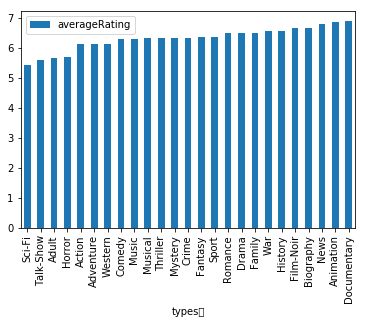

In [38]:
#visualized#
plt.figure()
test.plot(kind='bar')
